In [2]:
import os
from glob import glob
from pprint import pprint

cwd = os.getcwd()
print(cwd)

py_files = glob('*.py')
print(py_files)

C:\Users\jesse\Documents\grad school\masters research\code\fields_library\thesis_code_cleanup
['All_Code_Master.py', 'fields_demo.py', 'fields_functions.py', 'global_config.py']


In [3]:
### Config parameters are stroed in the global_config.py, imported at the top of the fields_functions.py
### Import fields functions
from fields_functions import *

C:\Users\jesse\Anaconda3\envs\gis_py37_update\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [4]:
### take a look at the config parameters

pprint(config)

{'kmeans_8var_clusters': True,
 'kmeans_from_full_tile_mask': False,
 'kmeans_mask_out_dir': 'mask_out_dir/',
 'kmeans_max_thresh': 0.3,
 'kmeans_min_thresh': 0,
 'kmeans_model_out_dir': 'kmeans_model_dir/',
 'kmeans_n_clusters': 15,
 'kmeans_ndwi_thresh': 0.2,
 'kmeans_range_thresh': 0.7,
 'kmeans_std_thresh': 0.2,
 'prep_apply_cloud_mask': True,
 'prep_base_chunk': 'auto',
 'prep_clip_outliers': True,
 'prep_clip_percentile': 1,
 'prep_cloud_coverage_thresh': 50,
 'prep_cloud_mask_thresh': 70,
 'prep_file_dir': 'C:/Users/jesse/Documents/grad school/masters '
                  'research/code/fields_library/data/rasters/from_MSI/',
 'prep_load_cloud_mask': True,
 'prep_manual_subset': True,
 'prep_normalize_bands': True,
 'prep_remove_overlap': False,
 'prep_step': 500,
 'prep_tile_id': 'TPT',
 'prep_time_chunk': 'auto',
 'prep_x_start': 7500,
 'prep_y_start': 7500,
 'preproc_cluster_tile': True,
 'preproc_n_clusters': 15,
 'preproc_out_dir': 'preproc_out_dir/',
 'preproc_outfile_prefi

In [4]:
### You can update the config dictionary interactively, too
config['prep_base_chunk'] = 500
pprint(config)

{'kmeans_8var_clusters': True,
 'kmeans_from_full_tile_mask': False,
 'kmeans_mask_out_dir': 'mask_out_dir/',
 'kmeans_max_thresh': 0.3,
 'kmeans_min_thresh': 0,
 'kmeans_model_out_dir': 'kmeans_model_dir/',
 'kmeans_n_clusters': 15,
 'kmeans_ndwi_thresh': 0.2,
 'kmeans_range_thresh': 0.7,
 'kmeans_std_thresh': 0.2,
 'prep_apply_cloud_mask': True,
 'prep_base_chunk': 500,
 'prep_clip_outliers': True,
 'prep_clip_percentile': 1,
 'prep_cloud_coverage_thresh': 50,
 'prep_cloud_mask_thresh': 70,
 'prep_file_dir': 'C:/Users/jesse/Documents/grad school/masters '
                  'research/code/fields_library/data/rasters/from_MSI/',
 'prep_load_cloud_mask': True,
 'prep_manual_subset': True,
 'prep_normalize_bands': True,
 'prep_remove_overlap': False,
 'prep_step': 500,
 'prep_tile_id': 'TPT',
 'prep_time_chunk': 'auto',
 'prep_x_start': 7500,
 'prep_y_start': 7500,
 'preproc_cluster_tile': True,
 'preproc_n_clusters': 15,
 'preproc_out_dir': 'preproc_out_dir/',
 'preproc_outfile_prefix':

In [5]:
ds_time_stack = prep_data()

Cloud Coverage Threshold: 50
FAILED cloud coverage: 2019 05 03 with  99.009547 pct | nodata pixel pct: 0.126635
FAILED cloud coverage: 2019 05 06 with  72.591515 pct | nodata pixel pct: 5.957223
passed cloud coverage: 2019 05 13 with 34.97001 pct | nodata pixel pct: 0.134791
FAILED cloud coverage: 2019 05 16 with  72.077132 pct | nodata pixel pct: 5.796779
FAILED cloud coverage: 2019 05 23 with  96.121381 pct | nodata pixel pct: 0.149615
FAILED cloud coverage: 2019 05 26 with  73.563154 pct | nodata pixel pct: 5.719112
passed cloud coverage: 2019 06 02 with 21.420233 pct | nodata pixel pct: 0.193563
passed cloud coverage: 2019 06 05 with 3.328879 pct | nodata pixel pct: 5.51809
passed cloud coverage: 2019 06 12 with 3.1731840000000004 pct | nodata pixel pct: 0.164777
FAILED cloud coverage: 2019 06 15 with  91.997779 pct | nodata pixel pct: 5.732784
FAILED cloud coverage: 2019 06 22 with  95.609655 pct | nodata pixel pct: 0.121118
passed cloud coverage: 2019 06 25 with 31.59953999999999

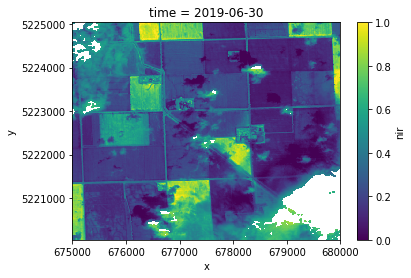

In [6]:
ds_time_stack.isel(time=8).nir.plot()

In [7]:
%%time

### preprocessing main function to combine data read and preprocessing.
### not used here, but it is useful for batch processing multiple tiles
def preprocess_main():
    global config
    ### START TIMING
    t_start = time.perf_counter()
    t_proc_start = time.process_time()
    
    ### Prep data stack
    ds_time_stack = prep_data()
    ds_time_stack = ds_time_stack.sel(time=slice('2019-05-01', '2019-11-01'))
    
    ### Preprocess data and save to netCDF file
    preprocess_to_netcdf(ds_time_stack)
    
    ### STOP TIMING
    t_stop = time.perf_counter()
    t_proc_stop = time.process_time()
    tot_cpu_time = t_proc_stop - t_proc_start
    tot_wall_time = t_stop - t_start
    ### timing
    print("Total CPU time:", tot_cpu_time)
    print("Total Wall time:", tot_wall_time)
    
    ### Write out processing log to record processing time and input parameters in the same folder as the shp output
    preprocessing_log(tot_cpu_time, tot_wall_time)
    
preprocess_to_netcdf(ds_time_stack)

C:\Users\jesse\Anaconda3\envs\gis_py37_update\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


Monthly Median Total CPU time: 200.578125
Monthly Median Total Wall time: 55.3910322
saving preprocessed tile to: preproc_out_dir/fields_preproc_demo_TPT.nc
Writing NetCDF file Total CPU time: 124.109375
Writing NetCDF file Total Wall time: 36.15644619999999
ndvi_mon_med_stack <xarray.DataArray (stack: 250000, variable: 6)>
dask.array<where, shape=(250000, 6), dtype=float64, chunksize=(250000, 6)>
Coordinates:
  * variable  (variable) datetime64[ns] 2019-05-01 2019-06-01 ... 2019-10-01
  * stack     (stack) MultiIndex
  - x         (stack) float64 6.75e+05 6.75e+05 6.75e+05 ... 6.8e+05 6.8e+05
  - y         (stack) float64 5.225e+06 5.225e+06 ... 5.22e+06 5.22e+06
image array to cluster: <xarray.DataArray (stack: 250000, variable: 8)>
dask.array<rechunk-merge, shape=(250000, 8), dtype=float64, chunksize=(250000, 8)>
Coordinates:
  * stack     (stack) MultiIndex
  - x         (stack) float64 6.75e+05 6.75e+05 6.75e+05 ... 6.8e+05 6.8e+05
  - y         (stack) float64 5.225e+06 5.225e+06

In [3]:
%%time

### This is for combining the preprocessed data and k-means cluster centers from the sampled chunks into a statewide mask

### This results in an unexpected NameError on the tile_id name but the outputs are as expected and I couldn't find the bug

write_statewide_kmeans_model()

t_start = time.time()
create_mask_from_kmeans()
print(tile_id, "mask processing done in %0.3fs." % (time.time() - t_start))

<xarray.Dataset>
Dimensions:       (cluster_vars: 8, n: 30)
Coordinates:
  * cluster_vars  (cluster_vars) object 'ndvi_may' 'ndvi_jun' ... 'ndwi_mean'
Dimensions without coordinates: n
Data variables:
    clusters      (n, cluster_vars) float64 dask.array<chunksize=(15, 8), meta=np.ndarray>
KMeans training on statewide samples done in 0.049s.
Cluster Centers: <xarray.DataArray (cluster_ID: 15, cluster_vars: 8)>
array([[-0.543879,  0.016334,  0.751787, -0.005141, -0.265205, -0.003878,
         0.688121,  0.362525],
       [-0.502735, -0.38443 ,  0.715243,  0.802312,  0.739985,  0.654352,
         0.694072,  0.251391],
       [-0.539738, -0.506893, -0.031666,  0.54338 , -0.052855, -0.636512,
         0.58431 ,  0.502191],
       [-0.480901, -0.432525, -0.024999,  0.733508,  0.762785, -0.327058,
         0.671602,  0.396021],
       [-0.213605,  0.060756,  0.395179,  0.435691,  0.363908,  0.076353,
         0.358162,  0.366851],
       [-0.522774, -0.004635,  0.757892, -0.055428, -0.54359

C:\Users\jesse\Anaconda3\envs\gis_py37_update\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)


NameError: name 'tile_id' is not defined

there are 1 patches for tile: TPT
<xarray.Dataset>
Dimensions:  (x: 500, y: 500)
Coordinates:
  * y        (y) float64 5.225e+06 5.225e+06 5.225e+06 ... 5.22e+06 5.22e+06
  * x        (x) float64 6.75e+05 6.75e+05 6.75e+05 ... 6.8e+05 6.8e+05 6.8e+05
Data variables:
    mask     (y, x) bool dask.array<chunksize=(500, 500), meta=np.ndarray>


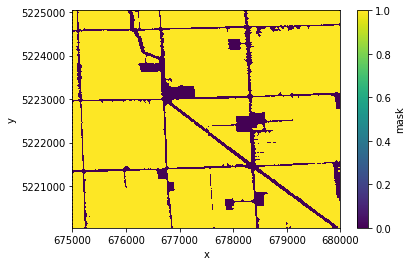

In [7]:
### Load mask to take a look at it

mask_array = load_mask()
mask_array.mask.plot()

In [8]:
%%time

### Demo function for combining 
def segmentation_from_clusters_main():
    mask_array = load_mask()
    
    ds_time_stack = prep_data()
    
    t0 = time.time()
    ### Segment the image
    segmented_array, rgb_image_nir = segment_data(ds_time_stack, mask_array)
    print("Segmentation done in %0.3fs." % (time.time() - t0))
    
    t0 = time.time()
    ### Write segments to shapefile
    write_shapefile(segmented_array, ds_time_stack, mask_array.mask)
    print("Shapefile write done in %0.3fs." % (time.time() - t0))
    
# t0 = time.time()    
# segmentation_from_clusters_main()
# print("Processing done in %0.3fs." % (time.time() - t0))
    
    
t0 = time.time()
### Segment the image
segmented_array, rgb_image_nir = segment_data(ds_time_stack, mask_array)
print("Segmentation done in %0.3fs." % (time.time() - t0))

t0 = time.time()
### Write segments to shapefile
write_shapefile(segmented_array, ds_time_stack, mask_array.mask)
print("Shapefile write done in %0.3fs." % (time.time() - t0))

-------Segmentation-------
date list: [datetime.datetime(2019, 6, 12, 0, 0), datetime.datetime(2019, 7, 2, 0, 0), datetime.datetime(2019, 7, 12, 0, 0), datetime.datetime(2019, 7, 22, 0, 0), datetime.datetime(2019, 7, 7, 0, 0), datetime.datetime(2019, 8, 6, 0, 0)]
cloud coverage: [3.1731840000000004, 0.438801, 3.086262, 1.7739530000000001, 0.247529, 0.038382]
no data pct: [0.164777, 0.100594, 0.086267, 0.070939, 0.065132, 0.06491]
[numpy.datetime64('2019-07-12T00:00:00.000000000'), numpy.datetime64('2019-08-06T00:00:00.000000000'), numpy.datetime64('2019-07-22T00:00:00.000000000')]
Segmentation done in 28.316s.
-------Writing to Shapefile-------
Output saved to: shp_dir/TPT_demo_x7500_y7500_step500.shp
Shapefile write done in 0.179s.
Wall time: 28.5 s


### Thresholding Approach

In [13]:
%%time

## Example code for running Thresholding approach
## These functions are not integrated into the global config, so variables have to be defined before the function call

### Set file paths for read and write
file_out_str = '_code_demo_threshold'
out_dir = config['shp_out_dir']
tile_id = config['prep_tile_id']
raster_dir = config['prep_file_dir']
x_start = config['prep_x_start']
y_start = config['prep_y_start']
step = config['prep_step']
base_chunk = 'auto'

## Data read parameters
cloud_thresh = 20

## Crop maask parameters
ndwi_thresh = 0.5 
ndvi_max_thresh = 0.5
ndvi_range_thresh = 0.5 
edges_thresh = 0.3

# set rgb date string from the dict
rgb_date_str = rgb_date_dict[tile_id]
rgb_gaussian_sigma = config['seg_rgb_gaussian_sigma']
fz_scale = config['seg_fz_scale']
fz_sigma = config['seg_fz_sigma']
fz_min_size = config['seg_fz_min_size']

# Load time stack - this function operates slightly differently than the one used above
# This one is outdated and the above should be used going forward
ds_time_stack = prep_ds_time_stack(raster_dir, 
                           tile_id, 
                           cloud_coverage_thresh = cloud_thresh,
                           cloud_mask = False,
                           base_chunk = "auto", 
                           overlap_bool = False, 
                           manual_subset = True, x_start = x_start, y_start = y_start, step = step)
    
### Select only May to September data, don't want to use March/April for Twin Cities metro tiles
ds_time_stack = ds_time_stack.sel(time=slice('2019-05-01', '2019-10-01'))

print("tile loaded:", tile_id)

# process_all_no_data_read(input_ds = ds_time_stack, tile_id = tile_id, 
#                          out_dir = out_dir, file_out_str = file_out_str, cloud_coverage_thresh = cloud_thresh, 
#                          subset = True, x_start = x_start, y_start = y_start, step = step, base_chunk="auto", 
#                          ndwi_thresh = ndwi_thresh, ndvi_max_thresh = ndvi_max_thresh, ndvi_range_thresh = ndvi_range_thresh, 
#                          edges_thresh = edges_thresh,
#                          rgb_date_str = rgb_date_str, rgb_gaussian_sigma = rgb_gaussian_sigma, 
#                          fz_scale = fz_scale, fz_sigma = fz_sigma, fz_min_size = fz_min_size)


Cloud Coverage Threshold: 20
FAILED cloud coverage: 2019 05 03 with  99.009547 pct | nodata pixel pct: 0.126635
FAILED cloud coverage: 2019 05 06 with  72.591515 pct | nodata pixel pct: 5.957223
FAILED cloud coverage: 2019 05 13 with  34.97001 pct | nodata pixel pct: 0.134791
FAILED cloud coverage: 2019 05 16 with  72.077132 pct | nodata pixel pct: 5.796779
FAILED cloud coverage: 2019 05 23 with  96.121381 pct | nodata pixel pct: 0.149615
FAILED cloud coverage: 2019 05 26 with  73.563154 pct | nodata pixel pct: 5.719112
FAILED cloud coverage: 2019 06 02 with  21.420233 pct | nodata pixel pct: 0.193563
passed cloud coverage: 2019 06 05 with 3.328879 pct | nodata pixel pct: 5.51809
passed cloud coverage: 2019 06 12 with 3.1731840000000004 pct | nodata pixel pct: 0.164777
FAILED cloud coverage: 2019 06 15 with  91.997779 pct | nodata pixel pct: 5.732784
FAILED cloud coverage: 2019 06 22 with  95.609655 pct | nodata pixel pct: 0.121118
FAILED cloud coverage: 2019 06 25 with  31.59953999999

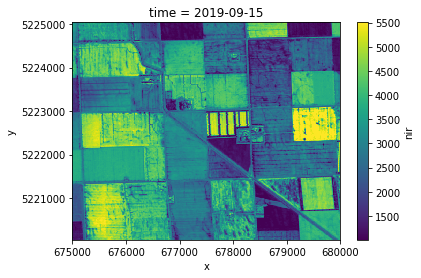

In [6]:
ds_time_stack.isel(time=12).nir.plot()

In [15]:
%%time

### Preprocessing to compute crop mask
ds_time_stack = mask_processing(ds_time_stack, 
                                ndwi_thresh = ndwi_thresh, 
                                ndvi_max_thresh = ndvi_max_thresh, 
                                ndvi_range_thresh = ndvi_range_thresh, 
                                edges_thresh = edges_thresh)

print(ds_time_stack)

<xarray.Dataset>
Dimensions:  (time: 15, x: 500, y: 500)
Coordinates:
  * x        (x) float64 6.75e+05 6.75e+05 6.75e+05 ... 6.8e+05 6.8e+05 6.8e+05
  * y        (y) float64 5.225e+06 5.225e+06 5.225e+06 ... 5.22e+06 5.22e+06
  * time     (time) datetime64[ns] 2019-05-31 2019-06-05 ... 2019-09-25
Data variables:
    red      (time, y, x) int32 dask.array<chunksize=(15, 500, 500), meta=np.ndarray>
    green    (time, y, x) int32 dask.array<chunksize=(15, 500, 500), meta=np.ndarray>
    blue     (time, y, x) int32 dask.array<chunksize=(15, 500, 500), meta=np.ndarray>
    nir      (time, y, x) int32 dask.array<chunksize=(15, 500, 500), meta=np.ndarray>
    mask     (y, x) bool dask.array<chunksize=(500, 500), meta=np.ndarray>
Attributes:
    transform:     (10.0, 0.0, 600000.0, 0.0, -10.0, 5300040.0)
    crs:           +init=epsg:32614
    res:           (10.0, 10.0)
    is_tiled:      1
    nodatavals:    (nan, nan, nan, nan)
    scales:        (1.0, 1.0, 1.0, 1.0)
    offsets:       (0

C:\Users\jesse\Anaconda3\envs\gis_py37_update\lib\site-packages\dask\compatibility.py:93: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)


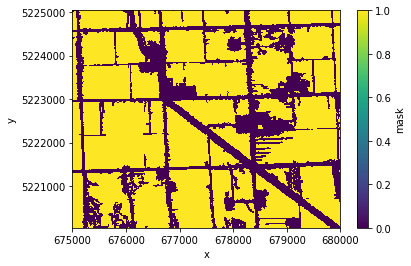

In [11]:
### plot crop mask

ds_time_stack.mask.plot()

In [17]:
ds_time_stack['rgb'] = rgb_image(rgb_date_str = rgb_date_str, 
                                          ds_time_stack = ds_time_stack, 
                                          rgb_chunk_size = {'band': "auto", 'x': base_chunk, 'y': base_chunk}, 
                                          gaussian_filt = True, 
                                          gaussian_sigma = rgb_gaussian_sigma, 
                                          percentile = 1)
print(ds_time_stack)

<xarray.Dataset>
Dimensions:  (band: 3, time: 15, x: 500, y: 500)
Coordinates:
  * x        (x) float64 6.75e+05 6.75e+05 6.75e+05 ... 6.8e+05 6.8e+05 6.8e+05
  * y        (y) float64 5.225e+06 5.225e+06 5.225e+06 ... 5.22e+06 5.22e+06
  * time     (time) datetime64[ns] 2019-05-31 2019-06-05 ... 2019-09-25
  * band     (band) <U1 'r' 'g' 'b'
Data variables:
    red      (time, y, x) int32 dask.array<chunksize=(15, 500, 500), meta=np.ndarray>
    green    (time, y, x) int32 dask.array<chunksize=(15, 500, 500), meta=np.ndarray>
    blue     (time, y, x) int32 dask.array<chunksize=(15, 500, 500), meta=np.ndarray>
    nir      (time, y, x) int32 dask.array<chunksize=(15, 500, 500), meta=np.ndarray>
    mask     (y, x) bool dask.array<chunksize=(500, 500), meta=np.ndarray>
    rgb      (y, x, band) float64 dask.array<chunksize=(500, 500, 3), meta=np.ndarray>
Attributes:
    transform:     (10.0, 0.0, 600000.0, 0.0, -10.0, 5300040.0)
    crs:           +init=epsg:32614
    res:           (10

C:\Users\jesse\Anaconda3\envs\gis_py37_update\lib\site-packages\dask\compatibility.py:93: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)


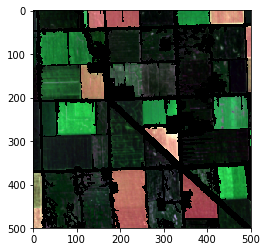

In [18]:
### plot masked RGB image

plt.imshow(ds_time_stack.rgb)

In [19]:
%%time 
### Segment the RGB image
fz_segments = ds_time_stack.rgb.data.map_blocks(segment_fz, scale = fz_scale, sigma = fz_sigma, min_size = fz_min_size, drop_axis = 2)
ds_time_stack['fz_segments'] = xr.DataArray(fz_segments.astype('int32'), 
                                            dims=('y','x'),
                                            coords = [ds_time_stack['red'].coords['y'],ds_time_stack['red'].coords['x']])

Wall time: 9.97 ms


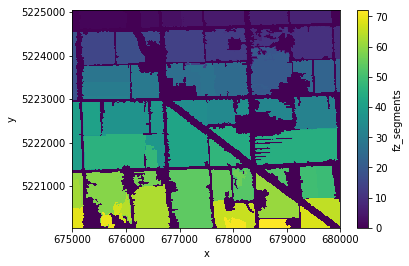

In [20]:
### Plot field segments
ds_time_stack.fz_segments.plot()

In [24]:
%%time

## write to shapefile
config['shp_file_out_str'] = file_out_str

write_shapefile(ds_time_stack.fz_segments.values, ds_time_stack, ds_time_stack.mask)


-------Writing to Shapefile-------
Output saved to: shp_dir/TPT_code_demo_threshold_x7500_y7500_step500.shp
Wall time: 12.6 s
